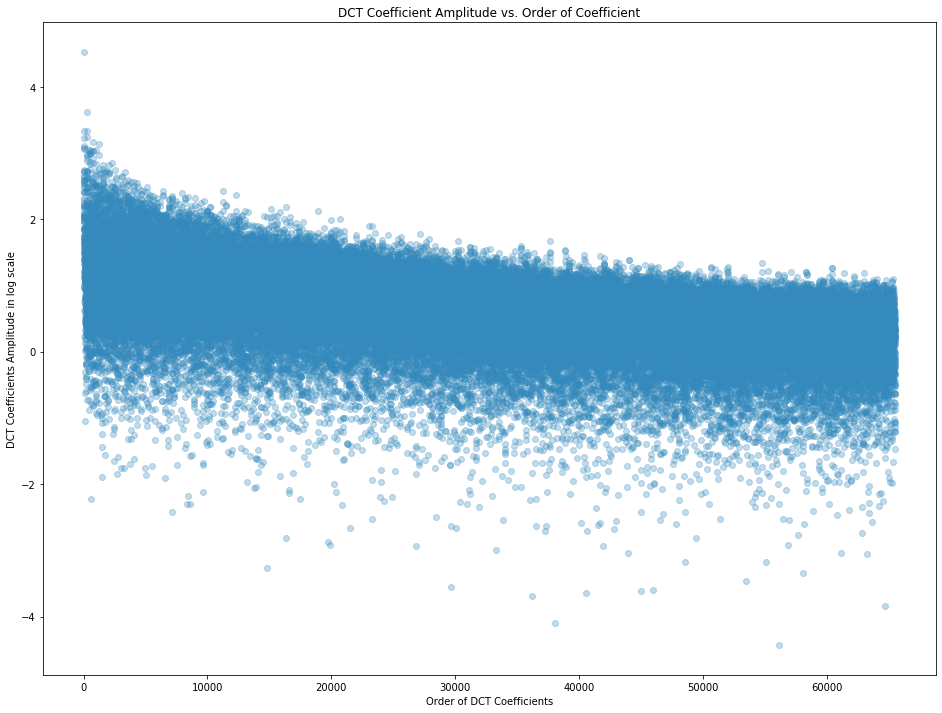

In [1]:
%matplotlib inline
import io
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import imageio
#import urllib2
import IPython
import cv2
from scipy.stats import kurtosis, skew
from skimage.restoration import estimate_sigma
def get_2D_dct(img):
    """ Get 2D Cosine Transform of Image
    """
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def get_2d_idct(coefficients):
    """ Get 2D Inverse Cosine Transform of Image
    """
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

def get_reconstructed_image(raw):
    img = raw.clip(0, 255)
    img = img.astype('uint8')
    img = Image.fromarray(img)
    return img

#img1 = imageio.imread("datasets/4cam_auth/canong3_02_sub_01.tif")
image = Image.open("Au_art_0049.jpg")
img_color = image.resize((256,256), 1)
img_grey = img_color.convert('L')
img1 = np.array(img_grey, dtype=np.float)
#img1  = image.resize((256,256), 1)

pixels = img1
dct_size = pixels.shape[0]
dct = get_2D_dct(pixels)
#print(dct.size)
reconstructed_images = []

for ii in range(dct_size):
    dct_copy = dct.copy()
    dct_copy[ii:,:] = 0
    dct_copy[:,ii:] = 0
    
    # Reconstructed image
    r_img = get_2d_idct(dct_copy);
    reconstructed_image = get_reconstructed_image(r_img);

    # Create a list of images
    reconstructed_images.append(reconstructed_image);

plt.figure(figsize=(16, 12));
plt.scatter(range(dct.ravel().size), np.log10(np.abs(dct.ravel())), c='#348ABD', alpha=.3);
plt.title('DCT Coefficient Amplitude vs. Order of Coefficient');
plt.xlabel('Order of DCT Coefficients');
plt.ylabel('DCT Coefficients Amplitude in log scale');

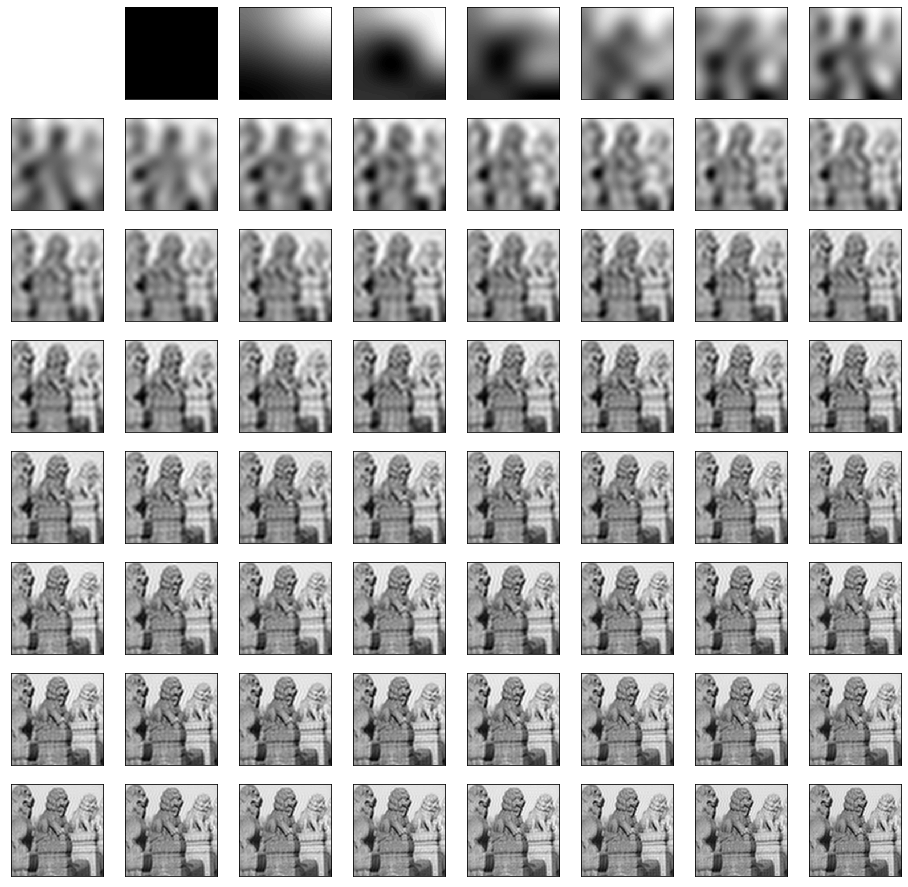

In [24]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    if ii == 0: 
        continue
    plt.subplot(8, 8, ii + 1)
    plt.imshow(reconstructed_images[ii], cmap=plt.cm.gray)
    plt.imsave("dct/" + str(ii) + ".png", reconstructed_images[ii],cmap=plt.cm.gray)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    

In [6]:
# import the necessary packages
import imutils
import cv2
def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image

    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)

        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break

        # yield the next image in the pyramid
        yield image

def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
            
img1 = cv2.imread('lena.tif')
(winW, winH) = (32, 32)
i=1
# loop over the image pyramid
for resized in pyramid(img1, scale=1.5):
    # loop over the sliding window for each layer of the pyramid
    for (x, y, window) in sliding_window(resized, stepSize=1, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
        clone = resized.copy()
        crop_img = clone[x:x+winW,y:y+winH]
        cv2.imwrite("wds/" + str(i) + ".png", crop_img)
        i=i+1


In [26]:
#kurtosis
import cv2
from scipy.stats import kurtosis, skew
from skimage.restoration import estimate_sigma

path = "dct/"
dirs = os.listdir(path)
for item in dirs:
    fullpath = os.path.join(path,item)        
    if os.path.isfile(fullpath):
        gray_img = cv2.imread(fullpath, cv2.IMREAD_GRAYSCALE)
        
        print(fullpath + "\t kurtosis= " + str(kurtosis(gray_img, axis=None)) + "\t noise variance = " + str(estimate_sigma(gray_img, multichannel=True, average_sigmas=True)))
    

dct/1.png	 kurtosis= -3.0	 noise variance = nan
dct/10.png	 kurtosis= -0.3524635727571903	 noise variance = 0.5606894841882212
dct/11.png	 kurtosis= -0.3739915008697401	 noise variance = 0.5855760223614014
dct/12.png	 kurtosis= -0.25571061000465045	 noise variance = 0.5551886070649178
dct/13.png	 kurtosis= -0.20034107386241962	 noise variance = 0.5507456307412288
dct/14.png	 kurtosis= -0.18303812881557402	 noise variance = 0.5515416950378347
dct/15.png	 kurtosis= -0.17893917503749668	 noise variance = 0.5609565980850179
dct/16.png	 kurtosis= -0.1735873438837774	 noise variance = 0.5705992240255434
dct/17.png	 kurtosis= -0.16445293216588164	 noise variance = 0.5580932639067882
dct/18.png	 kurtosis= -0.15954779430005095	 noise variance = 0.5673808532294498
dct/19.png	 kurtosis= -0.21486077820941096	 noise variance = 0.582938479416327
dct/2.png	 kurtosis= -0.8210765632200041	 noise variance = 0.5204183371234972
dct/20.png	 kurtosis= -0.2715896891671896	 noise variance = 0.5913637088832314